In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
Food_train=pd.read_excel(r"C:\Users\chaud\Downloads\Data_Train.xlsx")
Food_test=pd.read_excel(r"C:\Users\chaud\Downloads\Data_Test.xlsx")

In [6]:
Food_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [7]:
Food_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
Food_train.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [9]:
Food_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [10]:
Food_test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [11]:
Food_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

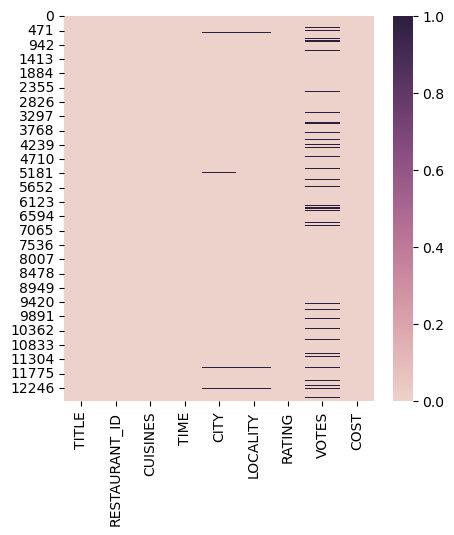

In [12]:
plt.figure(figsize = (5,5))
sns.heatmap(Food_train.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [13]:
import re
Food_train["VOTES"] = Food_train["VOTES"].str.replace("votes",'')
Food_train = Food_train.replace(to_replace='None', value=np.nan).dropna()

In [14]:
Food_train['CITY'].fillna("Not Present",inplace=True)
Food_train['LOCALITY'].fillna("Not Present",inplace=True)

Food_train['RATING'].replace("-",0.,inplace=True)
Food_train['RATING'].replace("NEW",0.,inplace=True)

Food_train['RATING'].fillna(Food_train['RATING'].median(),inplace=True)
Food_train['VOTES'].fillna(0.0, inplace=True)

In [15]:
Food_train.tail(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12680,QUICK BITES,13798,"North Indian, Fast Food, Desserts",10am – 11pm (Mon-Sun),New Delhi,Near Malviya Nagar,3.4,13,300
12681,CAFÉ,3241,"Beverages, Cafe, Bakery",11am – 11pm (Mon-Sun),Noida,Sector 18,4.1,300,450
12682,QUICK BITES,8085,Fast Food,11am – 11pm (Mon-Sun),Chennai.,Mogappair,3.6,30,450
12683,"QUICK BITES,SWEET SHOP",5430,"North Indian, South Indian, Street Food, Mithai",8:30am – 11pm (Mon-Sun),New Delhi,Pitampura,4.1,1426,500
12684,CASUAL DINING,8324,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Moti Nagar,3.8,492,550
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677,600


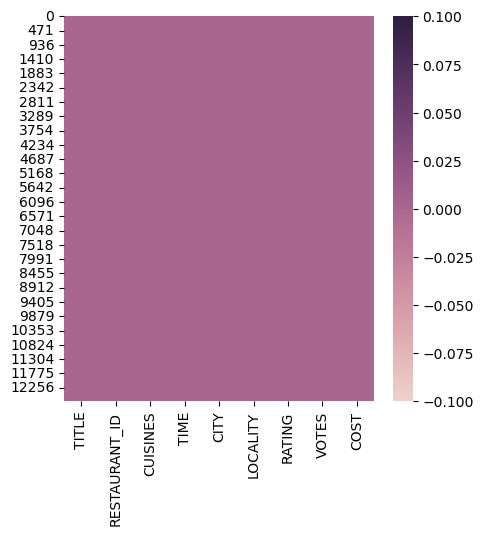

In [16]:
plt.figure(figsize = (5,5))
sns.heatmap(Food_train.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [17]:
Food_train.duplicated().sum()

19

In [18]:
Food_train= Food_train.drop_duplicates()
Food_train.duplicated().sum()
Food_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [19]:
val = Food_train['TITLE'].value_counts()[:50]
print(val)

QUICK BITES                     3668
CASUAL DINING                   3392
CAFÉ                             542
DESSERT PARLOR                   340
CASUAL DINING,BAR                335
FINE DINING                      306
BAKERY                           242
BAR,CASUAL DINING                119
BEVERAGE SHOP                    119
LOUNGE                            95
BAR                               87
BAKERY,QUICK BITES                85
FOOD COURT                        75
CASUAL DINING,CAFÉ                55
KIOSK                             52
MESS                              52
BAKERY,DESSERT PARLOR             51
PUB                               50
SWEET SHOP,QUICK BITES            46
DESSERT PARLOR,QUICK BITES        45
DHABA                             44
SWEET SHOP                        43
QUICK BITES,SWEET SHOP            35
CAFÉ,CASUAL DINING                34
FINE DINING,BAR                   32
CAFÉ,DESSERT PARLOR               31
PUB,CASUAL DINING                 28
L

Text(0.5, 0, 'Count')

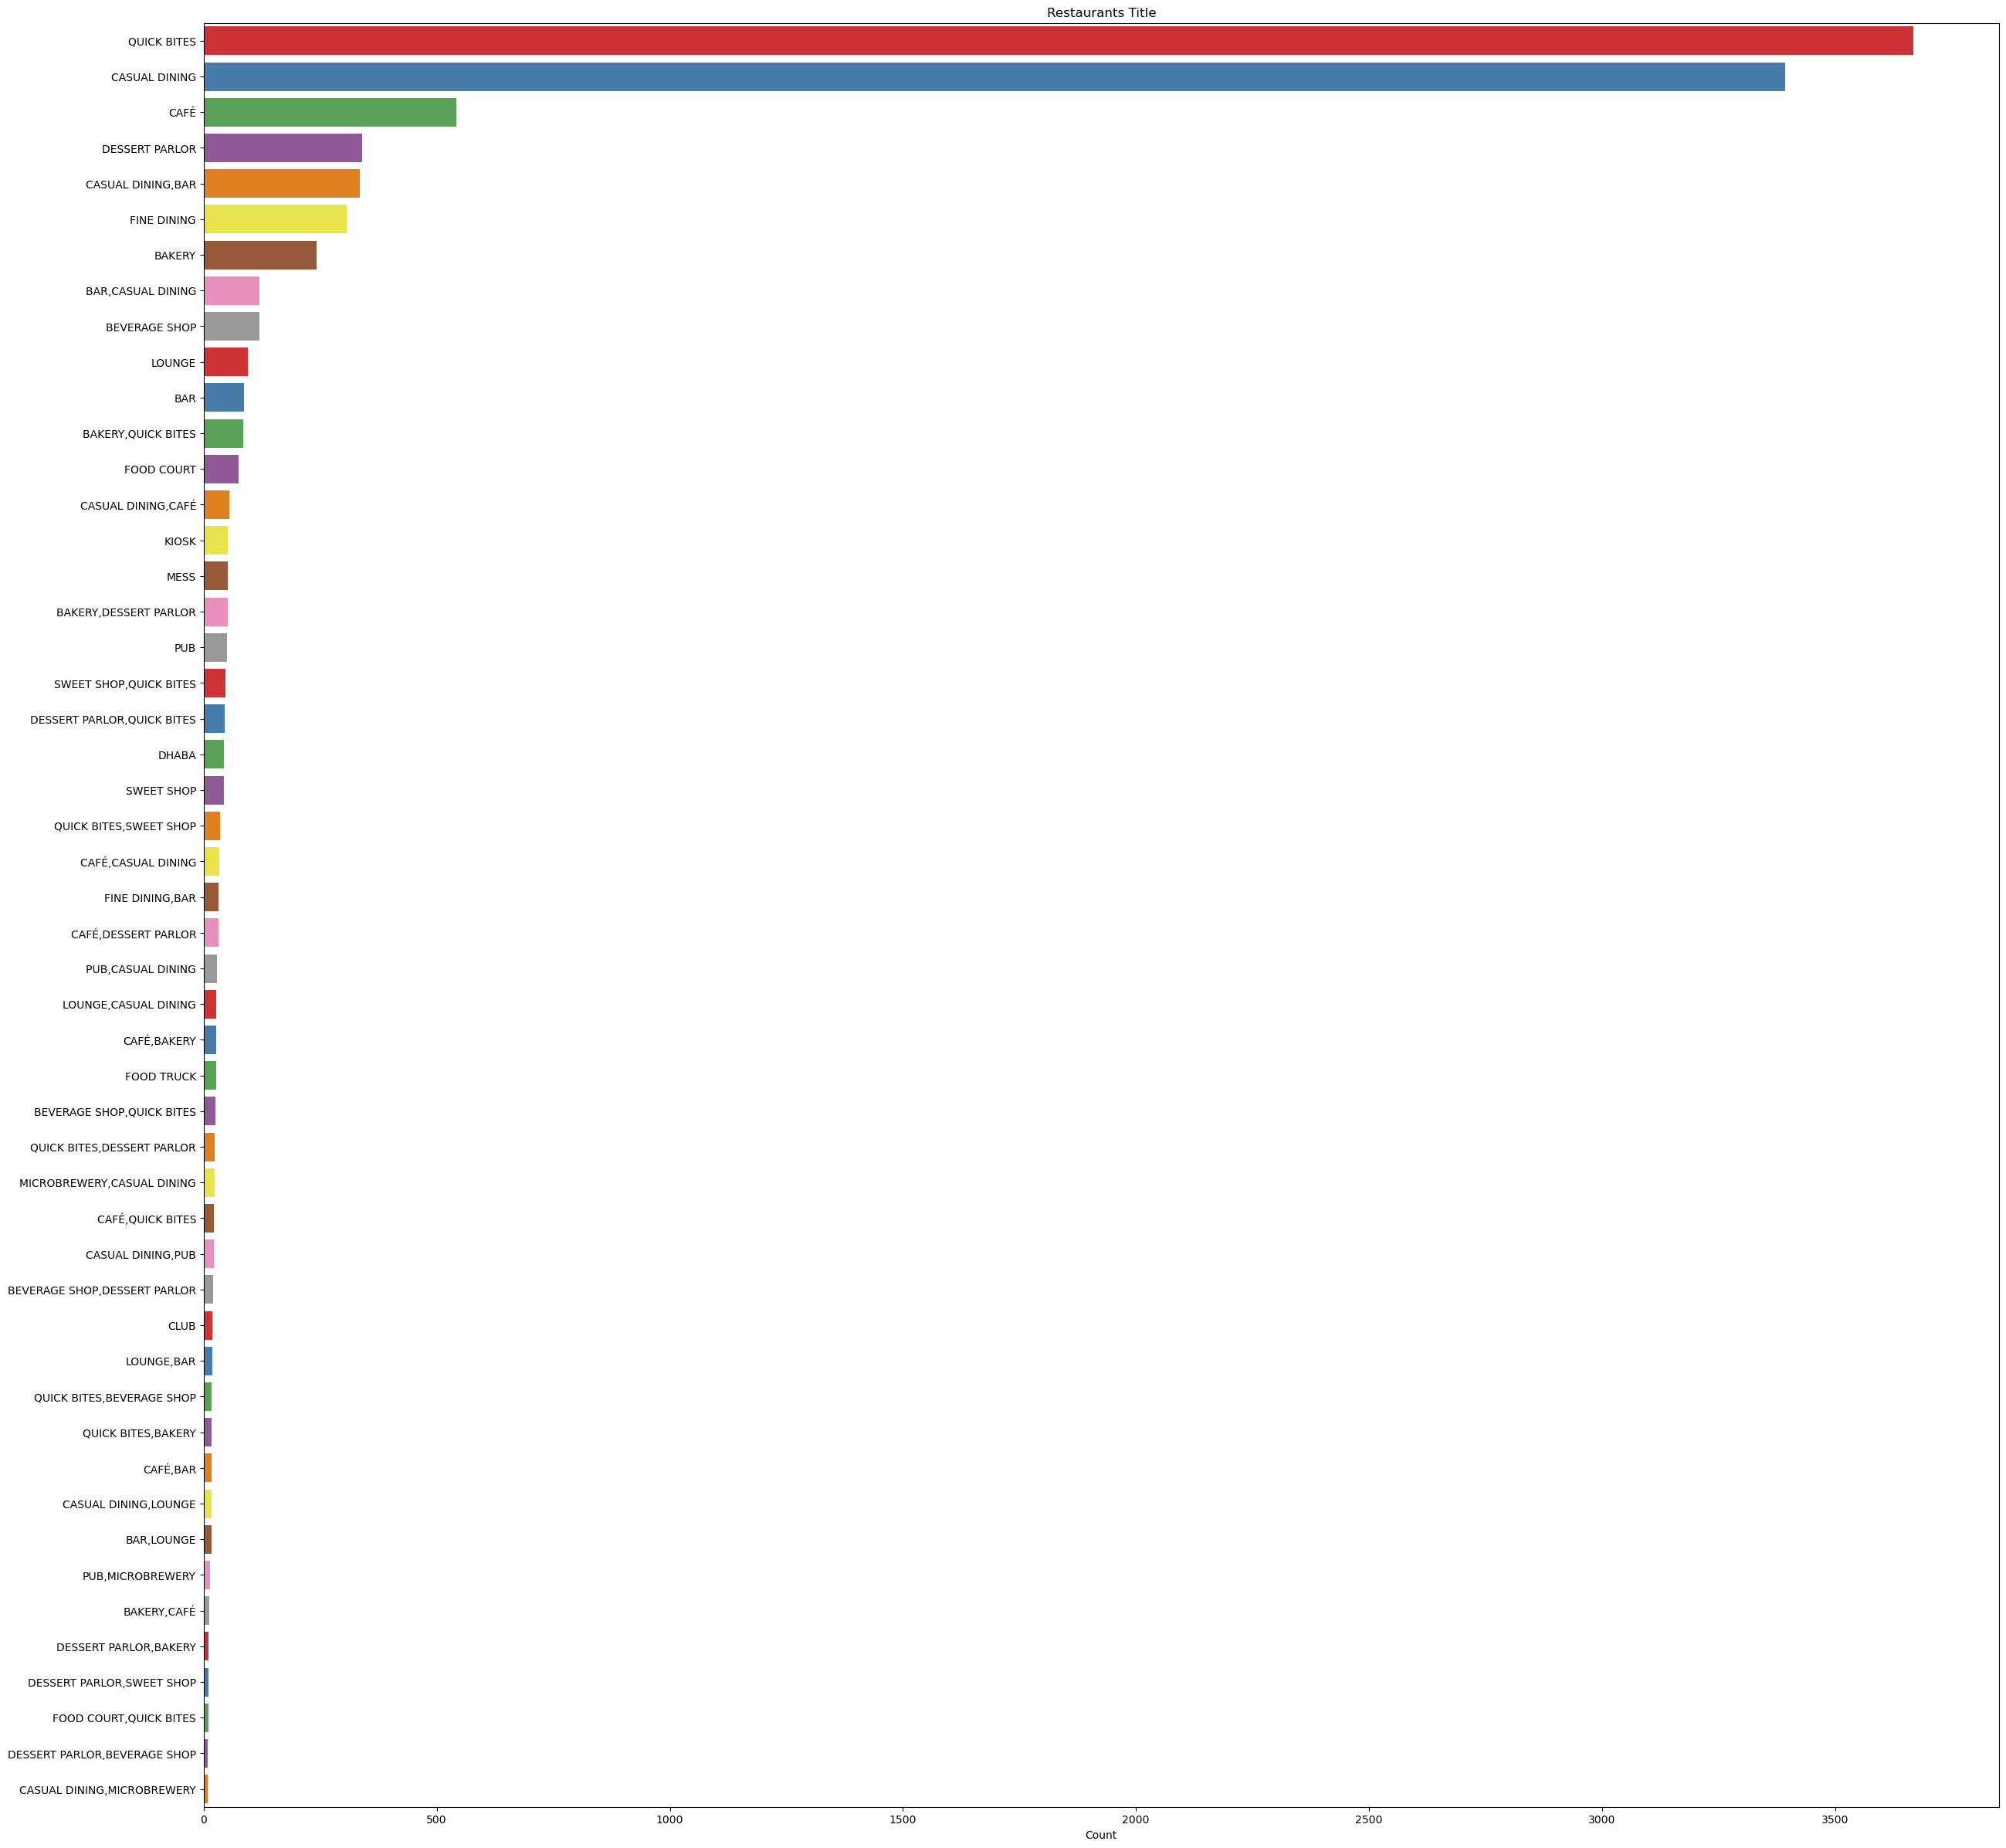

In [20]:
plt.figure(figsize=(30,30))
sns.barplot(x=val, y=val.index, palette = "Set1")
plt.title("Restaurants Title")
plt.xlabel("Count")

In [21]:
#sns.catplot(data=Food_train, x="TITLE", y="RATING", hue="CITY", kind="boxen")
Rest_rate =pd.pivot_table(Food_train, index=['TITLE'], aggfunc={'RATING':'count'})
Rest_rate

,RATING
TITLE,
BAKERY,242
"BAKERY,BEVERAGE SHOP",1
"BAKERY,CAFÉ",12
"BAKERY,CONFECTIONERY",1
"BAKERY,DESSERT PARLOR",51
...,...
"SWEET SHOP,BEVERAGE SHOP",1
"SWEET SHOP,CASUAL DINING",2
"SWEET SHOP,CONFECTIONERY",1


In [22]:
Rest_rate =pd.pivot_table(Food_train, index=['TITLE'], aggfunc={'CITY':'count'})
Rest_rate

,CITY
TITLE,
BAKERY,242
"BAKERY,BEVERAGE SHOP",1
"BAKERY,CAFÉ",12
"BAKERY,CONFECTIONERY",1
"BAKERY,DESSERT PARLOR",51
...,...
"SWEET SHOP,BEVERAGE SHOP",1
"SWEET SHOP,CASUAL DINING",2
"SWEET SHOP,CONFECTIONERY",1


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

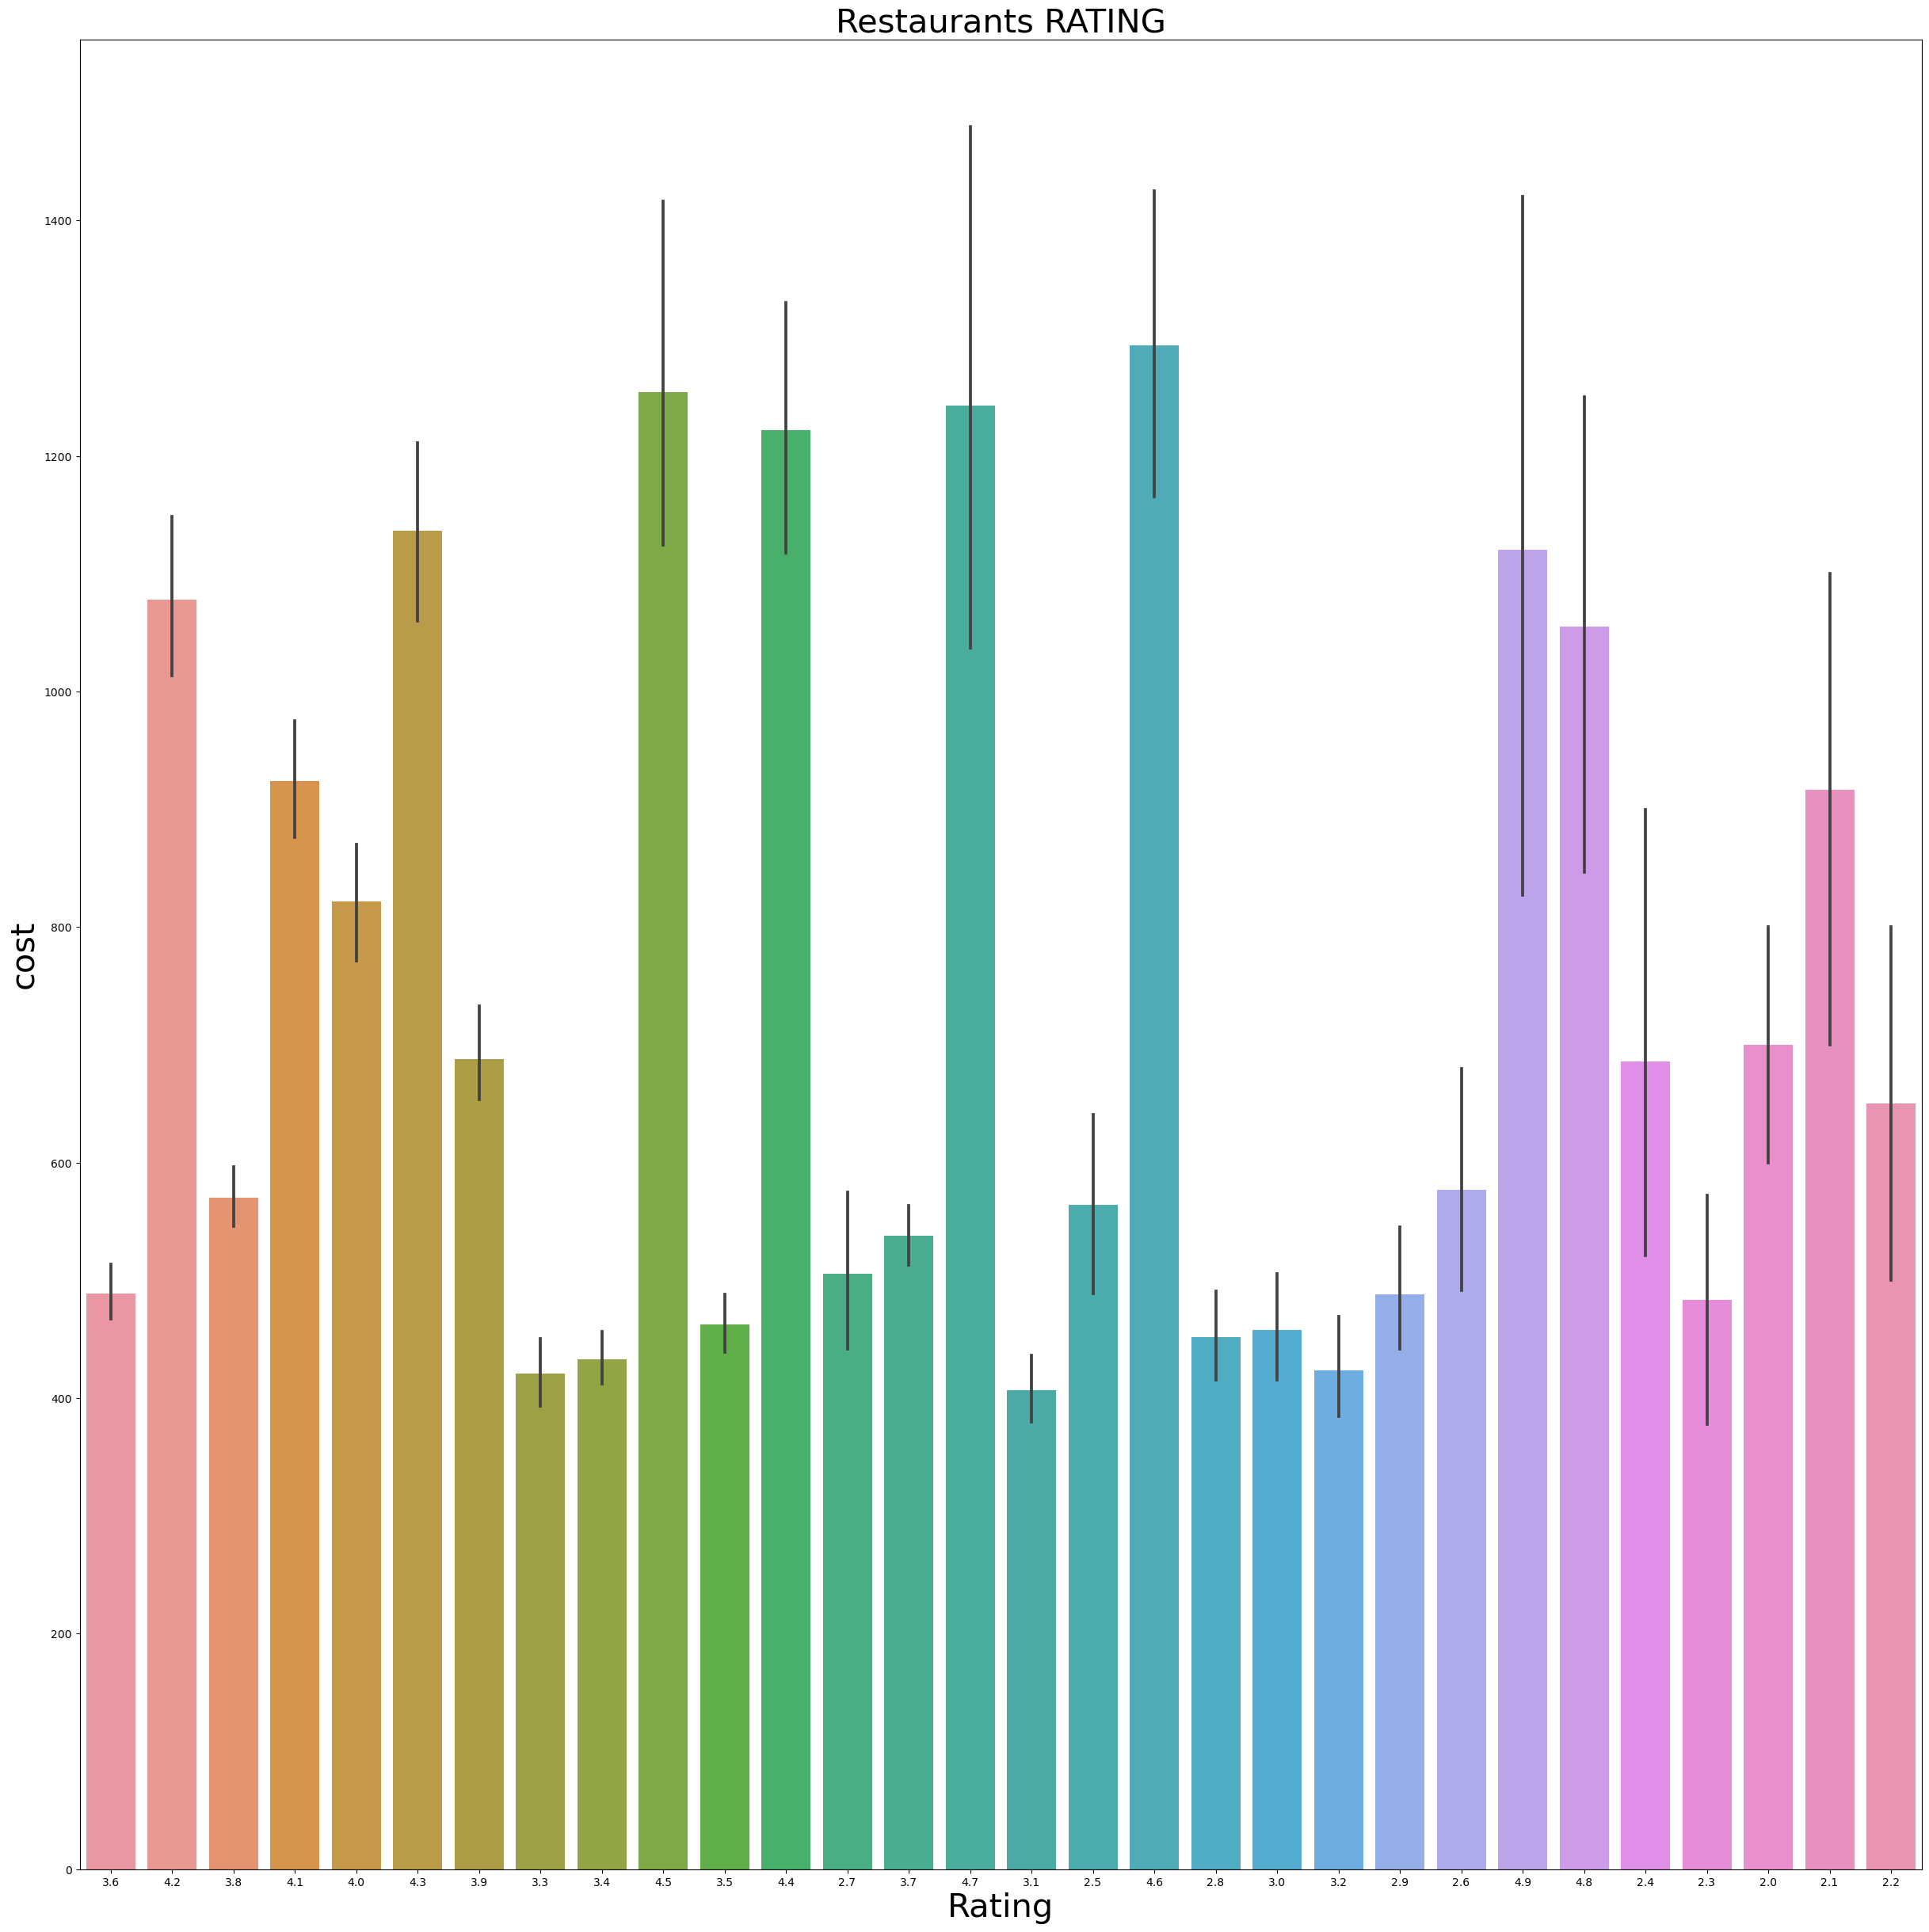

In [23]:
plt.figure(figsize=(30,30))
sns.barplot(data=Food_train, x="RATING", y="COST")
plt.title("Restaurants RATING",fontsize=30)
plt.xlabel("Rating",fontsize=30)
plt.ylabel("cost",fontsize=30)
plt.tight_layout

In [24]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelEncoder()
col =  Food_train.select_dtypes(include=['object']).columns.tolist()
for i in col:
    lb.fit(Food_train[i])
    Food_train[i] = lb.transform(Food_train[i])

In [26]:
Food_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,9438,2360,656,267,249,16,1267,1200
1,31,13198,262,1682,55,895,22,939,1500
2,29,10915,2680,584,55,947,18,704,800
3,92,6346,3733,238,187,117,21,778,800
4,48,15387,1596,543,187,535,18,464,300


In [27]:
Food_train.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000
mean,54.444581,7782.089654,2006.590600,1030.896917,116.756478,562.109703,17.839228,961.912616,703.084074
std,32.068181,4509.545011,1091.172267,657.221364,71.607050,343.261580,4.229408,500.313356,664.637243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,29.000000,3863.250000,1043.000000,487.000000,55.000000,291.000000,15.000000,562.000000,300.000000
50%,37.000000,7793.000000,2134.500000,1000.000000,114.000000,507.000000,18.000000,1011.000000,500.000000
75%,92.000000,11733.500000,2903.750000,1604.000000,187.000000,864.000000,21.000000,1370.000000,800.000000
max,109.000000,15569.000000,3751.000000,2365.000000,297.000000,1225.000000,29.000000,1829.000000,14000.000000


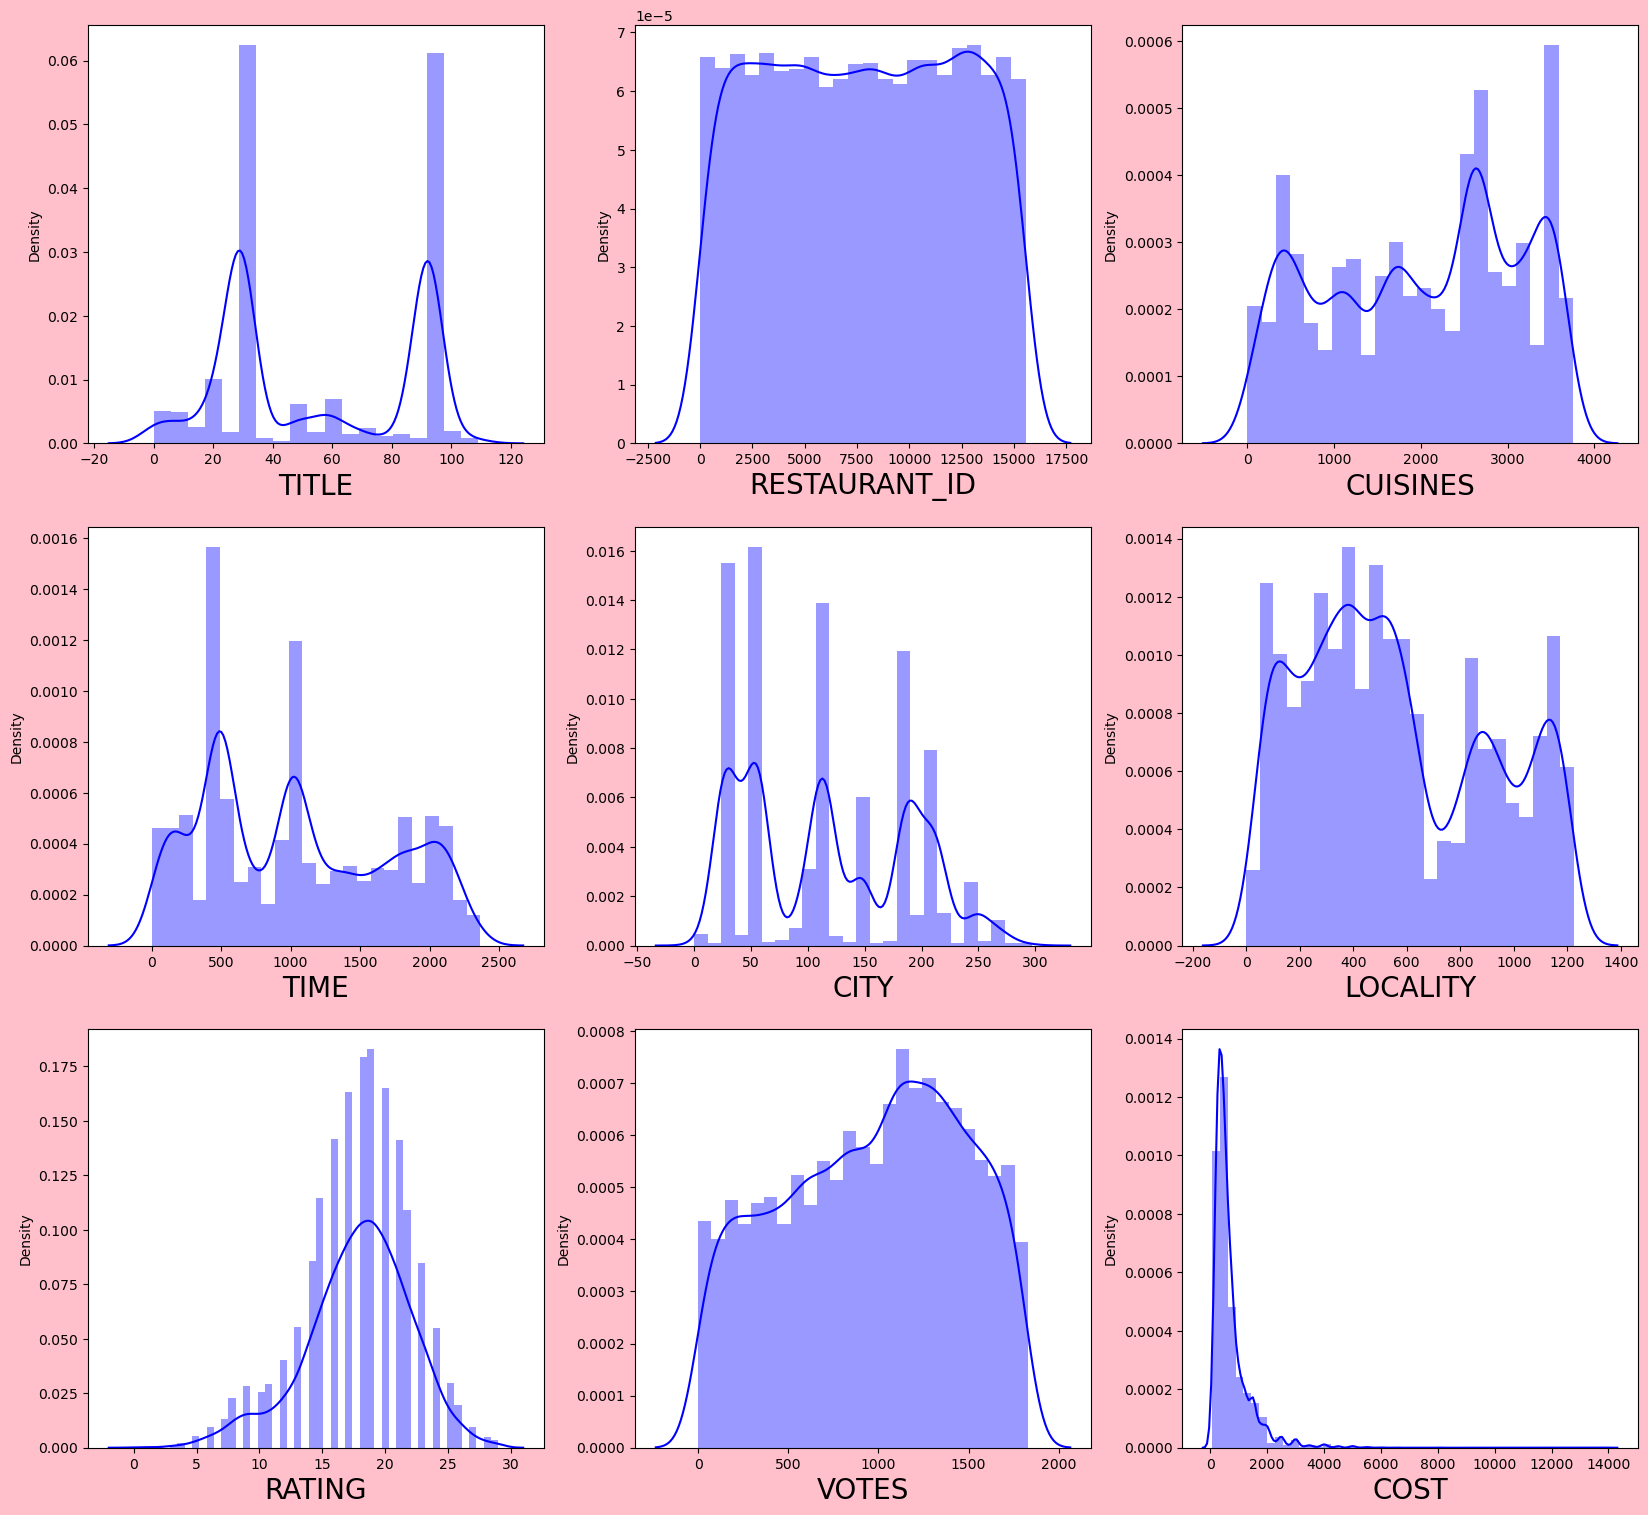

In [28]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber =1
for column in Food_train:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(Food_train[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

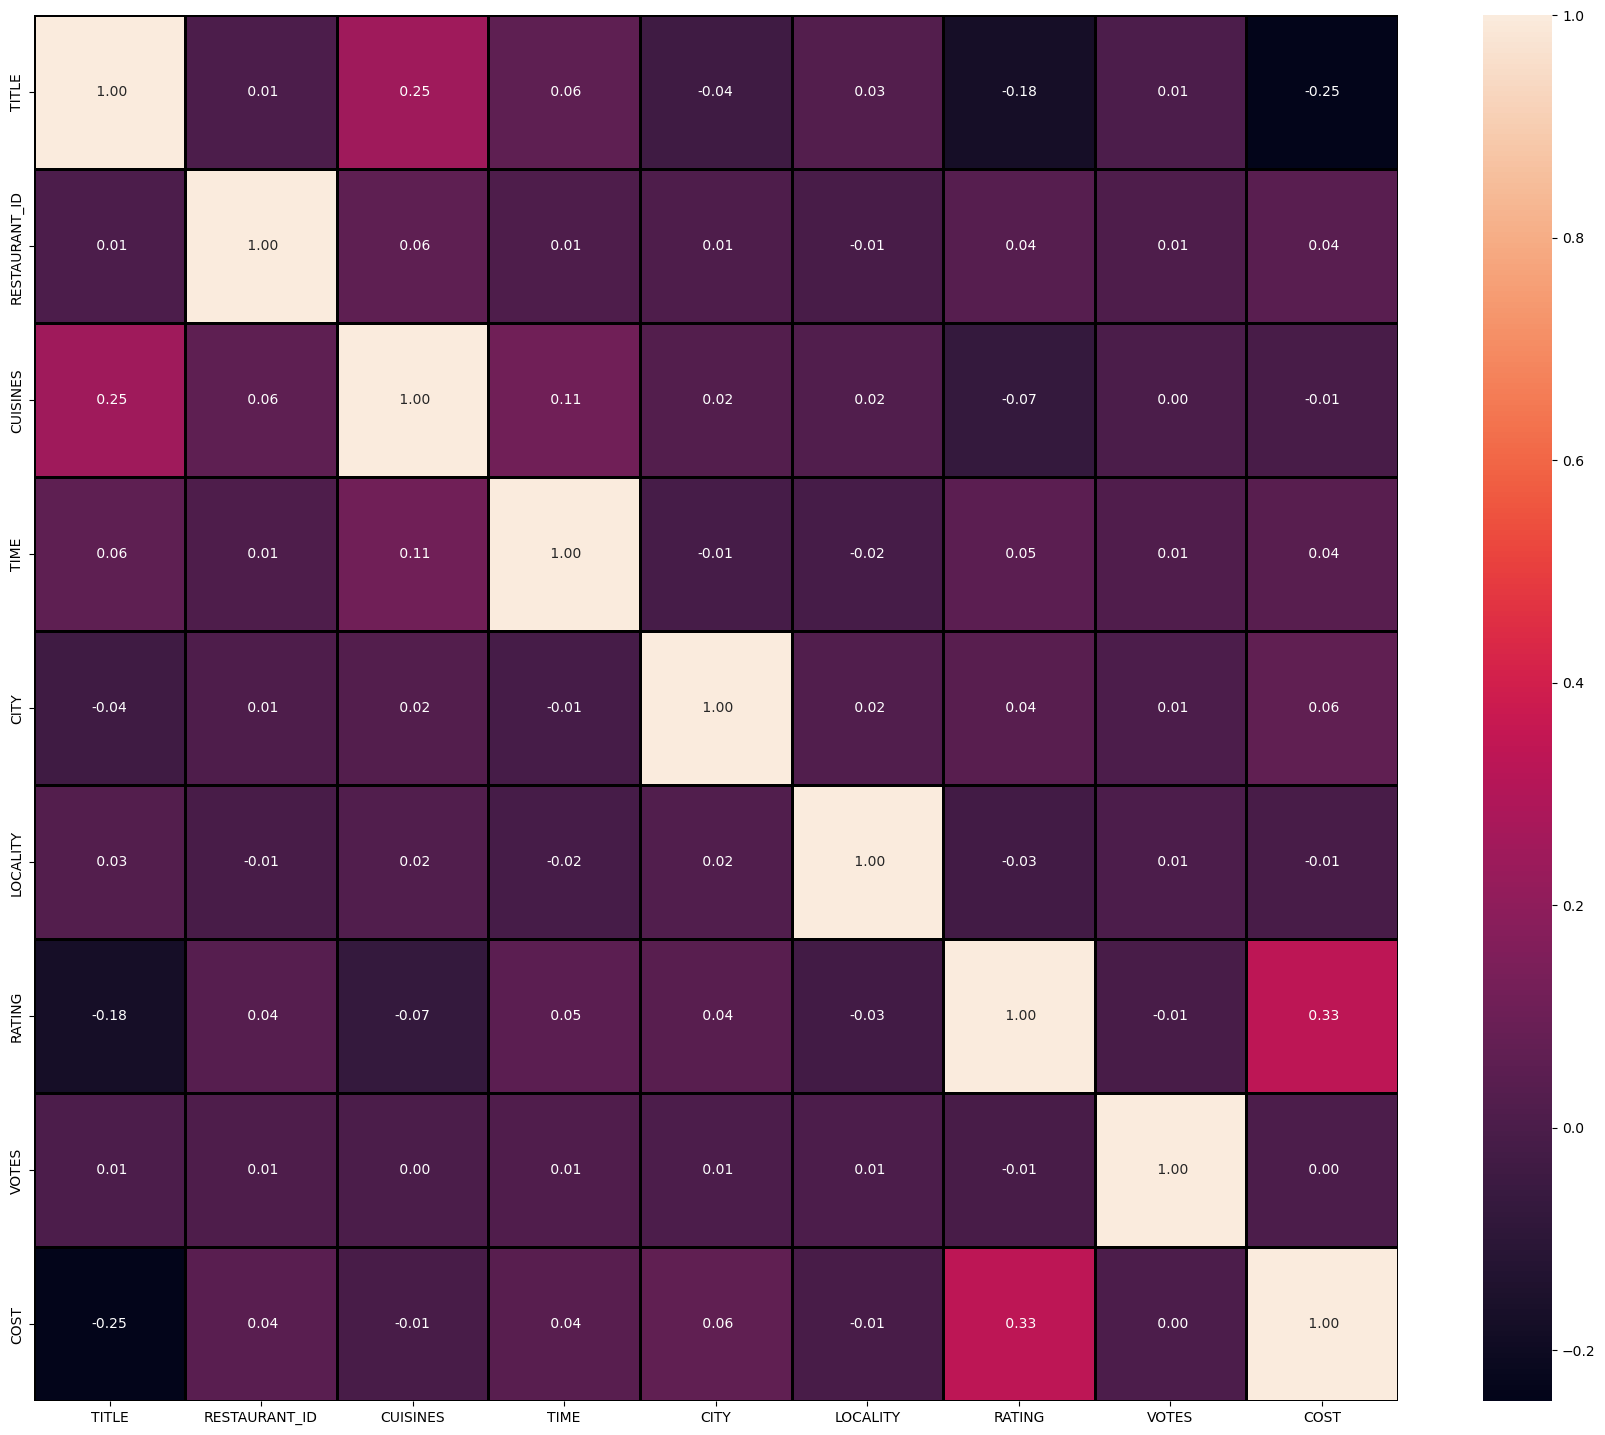

In [29]:
plt.figure(figsize=(22,18))
sns.heatmap(Food_train.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

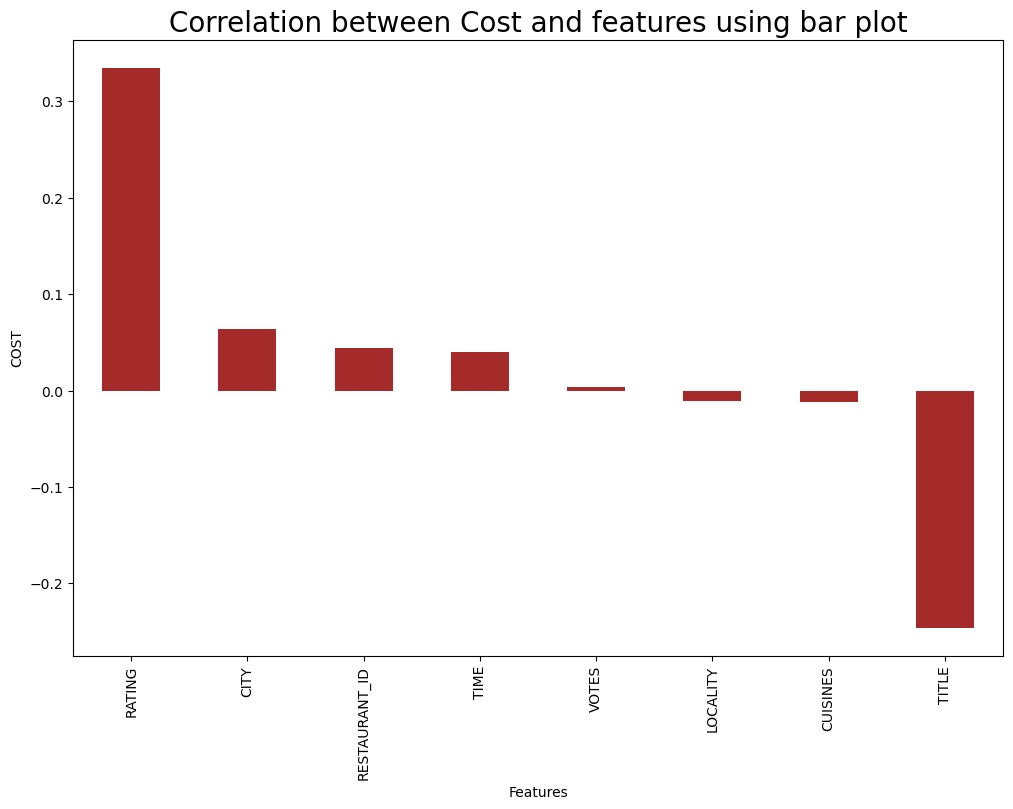

In [30]:
plt.figure(figsize=(12,8))
Food_train.corr()['COST'].sort_values(ascending=False).drop(['COST']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('COST',fontsize=10)
plt.title('Correlation between Cost and features using bar plot',fontsize=20)
plt.show()

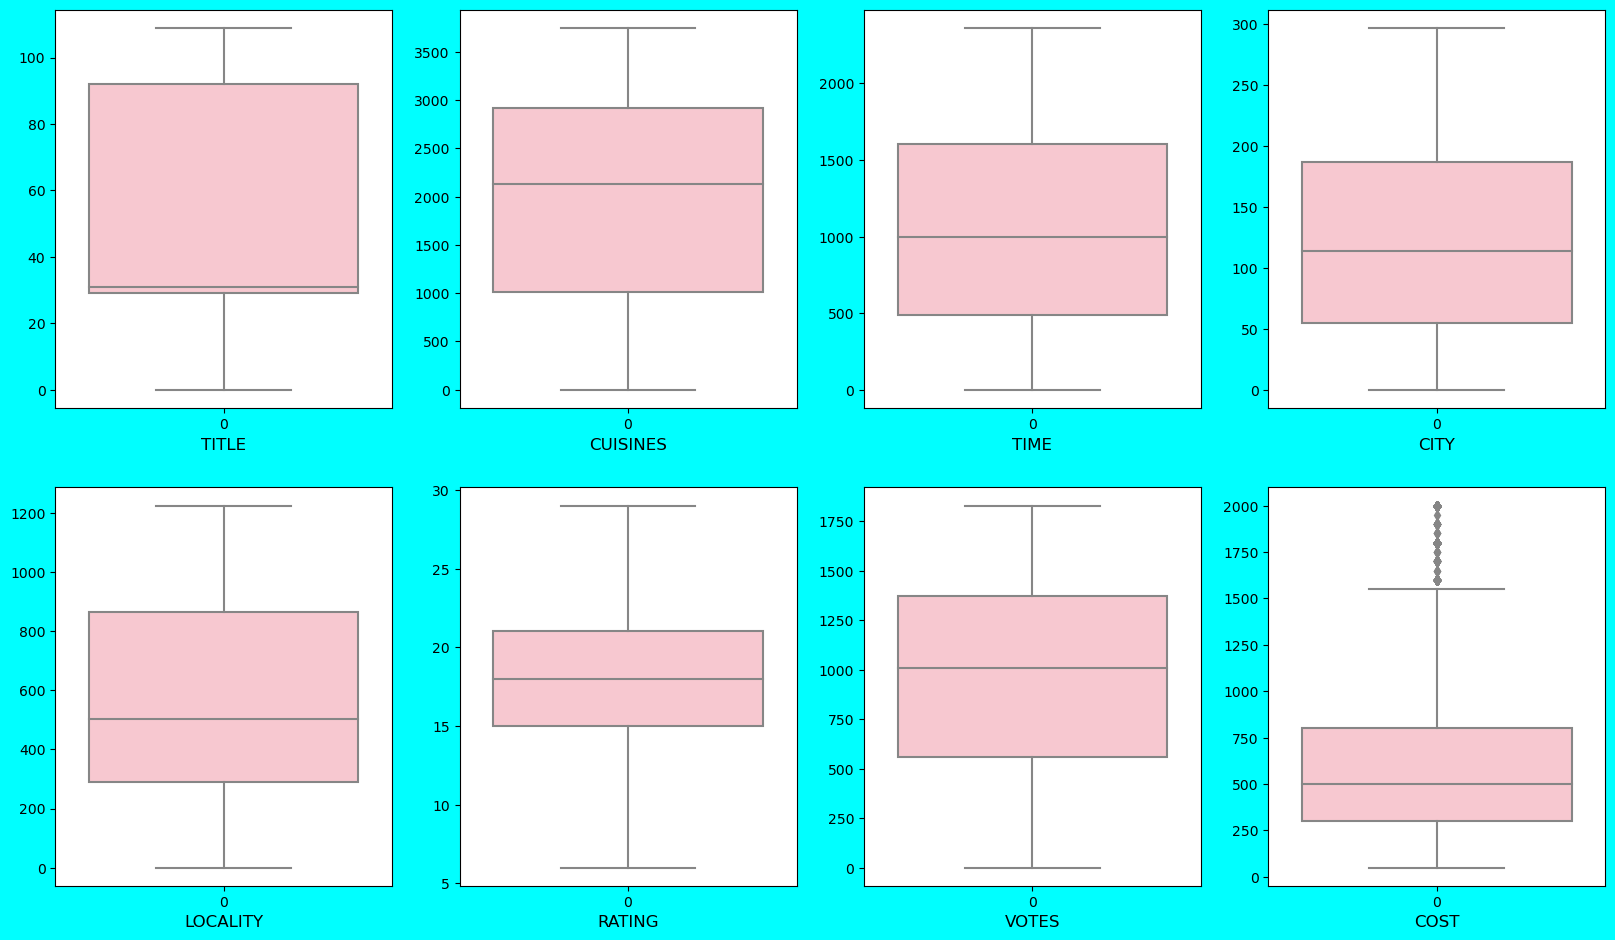

In [46]:
plt.figure(figsize=(20,30),facecolor='cyan')
index=1
for column in Food_train:
    if index <=20:
        ax = plt.subplot(5,4,index)
        sns.boxplot(Food_train[column], color='pink')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

In [32]:
from scipy import stats

z = abs(stats.zscore(Food_train))

Food_train = Food_train[(z < 3).all(axis=1)]

Food_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,9438,2360,656,267,249,16,1267,1200
1,31,13198,262,1682,55,895,22,939,1500
2,29,10915,2680,584,55,947,18,704,800
3,92,6346,3733,238,187,117,21,778,800
4,48,15387,1596,543,187,535,18,464,300
...,...,...,...,...,...,...,...,...,...
12685,92,13228,2640,1020,114,297,18,1338,500
12686,31,9686,1938,1051,187,114,23,190,1800
12687,69,11133,1884,1013,199,1158,20,1417,1300
12688,29,6134,3163,1641,55,544,15,985,400


In [33]:
from scipy import stats

z = abs(stats.zscore(Food_train))

Food_train = Food_train[(z < 3).all(axis=1)]

Food_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,9438,2360,656,267,249,16,1267,1200
1,31,13198,262,1682,55,895,22,939,1500
2,29,10915,2680,584,55,947,18,704,800
3,92,6346,3733,238,187,117,21,778,800
4,48,15387,1596,543,187,535,18,464,300
...,...,...,...,...,...,...,...,...,...
12685,92,13228,2640,1020,114,297,18,1338,500
12686,31,9686,1938,1051,187,114,23,190,1800
12687,69,11133,1884,1013,199,1158,20,1417,1300
12688,29,6134,3163,1641,55,544,15,985,400


In [37]:
Food_train.drop("RESTAURANT_ID",axis=1,inplace=True)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import  StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [38]:
X=Food_train.drop(['COST'],axis=1)
Y=Food_train['COST']

In [40]:
X.shape

(10129, 7)

In [41]:
Y.shape

(10129,)

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.78429358,  0.32602178, -0.55254533, ..., -0.9110047 ,
        -0.43754616,  0.61159924],
       [-0.72280261, -1.58351665,  0.99936247, ...,  0.97345748,
         1.02875824, -0.04437457],
       [-0.78429358,  0.61727644, -0.66145114, ...,  1.12514794,
         0.05122197, -0.51435581],
       ...,
       [ 0.44552567, -0.10721954, -0.01255402, ...,  1.74066113,
         0.53999011,  0.91158726],
       [-0.78429358,  1.05688896,  0.93734666, ..., -0.05045309,
        -0.68193023,  0.04762175],
       [-0.78429358,  0.59088149, -0.42548855, ...,  1.71440701,
        -0.92631429,  1.06558111]])

In [43]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (8103, 7)
x_test : (2026, 7)
y_train : (8103,)
y_test : (2026,)


In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
lr.coef_

array([-147.73939735,   30.37955097,  -15.21800653,   12.86201836,
          1.72317266,  130.32879972,    0.56940463])

In [59]:
lr.intercept_

611.7137049776217

In [60]:
lr.score(x_train,y_train)

0.24872549287343093

In [61]:
pred = lr.predict(x_test)
print('Predicted result :\n', pred)
print('\n')
print('actual result\n',y_test)

Predicted result :
 [ 356.60896878  801.79458487  810.68285993 ...  457.57039612 1024.16520002
  470.99407913]


actual result
 11082     120
655      1300
1427      650
9698      150
6123      300
         ... 
11778     450
10457    2000
12057     400
11191    1200
10646     800
Name: COST, Length: 2026, dtype: int64


In [64]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred))

 Error :
Mean absolute error : 261.07644941708406
Mean squared error : 128077.10007618772
Root Mean Squared Error: 357.87861081124663


 R2 Score :
0.2616202395034487


In [65]:
from sklearn.tree import DecisionTreeRegressor


In [66]:
dtr =DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)

In [68]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_test_pred))
print('Mean squared error :', mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_test_pred))

 Error :
Mean absolute error : 227.035538005923
Mean squared error : 109305.4146100691
Root Mean Squared Error: 330.6136939239951


 R2 Score :
0.3698412455251665


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf =RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
y_test_pred = rf.predict(x_test)

In [73]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_test_pred))
print('Mean squared error :', mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_test_pred))

 Error :
Mean absolute error : 165.6977591312932
Mean squared error : 54573.98852754195
Root Mean Squared Error: 233.6107628675142


 R2 Score :
0.6853744459053386


In [74]:
from sklearn.svm import SVR
svr =SVR()
svr.fit(x_train,y_train)

SVR()

In [79]:
y_test_predsvr = svr.predict(x_test)

In [80]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_test_predsvr))
print('Mean squared error :', mean_squared_error(y_test,y_test_predsvr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_predsvr)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_test_predsvr))

 Error :
Mean absolute error : 252.3248997793763
Mean squared error : 143476.528268475
Root Mean Squared Error: 378.7829566763465


 R2 Score :
0.1728406989482597


In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred = knn.predict(x_test)

In [83]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred))

 Error :
Mean absolute error : 238.8821322803554
Mean squared error : 113206.31443237906
Root Mean Squared Error: 336.46146054545244


 R2 Score :
0.3473520927038981


In [84]:
from sklearn.model_selection import GridSearchCV

In [93]:
parm_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],}

In [94]:
rf_cv = GridSearchCV(estimator=rf,param_grid=parm_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [96]:
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [97]:
rf_cv.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [98]:
y_test_pred = rf_cv.predict(x_test)

In [99]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_test_pred))
print('Mean squared error :', mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_test_pred))

 Error :
Mean absolute error : 165.38479971040533
Mean squared error : 54038.8023389182
Root Mean Squared Error: 232.4624751200034


 R2 Score :
0.6884598581261181


In [100]:
Food_test.drop("RESTAURANT_ID",axis=1,inplace=True)

In [101]:
Food_test["VOTES"] = Food_test["VOTES"].str.replace("votes","")

In [102]:
Food_test['CITY'].fillna("Not Present",inplace=True)
Food_test['LOCALITY'].fillna("Not Present",inplace=True)

Food_test['RATING'].replace("-",0.,inplace=True)
Food_test['RATING'].replace("NEW",0.,inplace=True)

Food_test['RATING'].fillna(0,inplace=True)
Food_test['VOTES'].fillna(0,inplace=True)
Food_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23


In [104]:
Food_test['RATING'] = Food_test['RATING'].astype("float")
Food_test['VOTES'] = Food_test['VOTES'].astype("int")

In [105]:
lb = LabelEncoder()
col =  Food_test.select_dtypes(include=['object']).columns.tolist()
for i in col:
    lb.fit(Food_test[i])
    Food_test[i] = lb.transform(Food_test[i])

In [106]:
Food_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,663,4.3,564
1,75,1632,933,96,221,4.2,61
2,23,1455,219,96,411,3.8,350
3,66,208,1071,41,456,3.8,1445
4,75,1637,208,78,300,3.6,23


In [107]:
test_pred = rf_cv.predict(Food_test)
test_pred

array([535.25, 535.25, 535.25, ..., 535.25, 474.5 , 535.25])

In [109]:

Food_test['COST']=test_pred

In [110]:
Food_test['COST']

0       535.25
1       535.25
2       535.25
3       535.25
4       535.25
         ...  
4226    535.25
4227    535.25
4228    535.25
4229    474.50
4230    535.25
Name: COST, Length: 4231, dtype: float64

In [111]:
Food_test.to_csv('predicted file.csv', header=True, index=False)